## Tutorial 1 - Autoencoder

In this example, we will use an autoencoder to 'learn' to recrate hand written digits.

In [19]:
import numpy as np

### Load and normalize our data

In [20]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


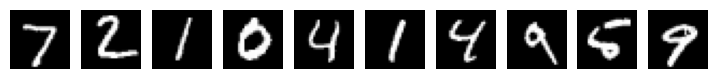

In [21]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

### Create an autoencoder model for bottleneck of size 6.

In [22]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 6 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 500)               392500    
                                                                 
 dense_17 (Dense)            (None, 300)               150300    
                                                                 
 dense_18 (Dense)            (None, 100)               30100     
                                                                 
 dense_19 (Dense)            (None, 6)                 606       
                                                                 
 dense_20 (Dense)            (None, 100)               700       
                                                                 
 dense_21 (Dense)            (None, 300)               30300     
                                                                 
 dense_22 (Dense)            (None, 500)              

### Train the autoencoder model.

In [23]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 19s 38ms/step - loss: 0.1946 - val_loss: 0.1484
Epoch 2/10
469/469 [==============================] - 16s 35ms/step - loss: 0.1428 - val_loss: 0.1378
Epoch 3/10
469/469 [==============================] - 16s 35ms/step - loss: 0.1359 - val_loss: 0.1333
Epoch 4/10
469/469 [==============================] - 18s 38ms/step - loss: 0.1321 - val_loss: 0.1308
Epoch 5/10
469/469 [==============================] - 18s 38ms/step - loss: 0.1295 - val_loss: 0.1285
Epoch 6/10
469/469 [==============================] - 17s 36ms/step - loss: 0.1276 - val_loss: 0.1275
Epoch 7/10
469/469 [==============================] - 16s 35ms/step - loss: 0.1259 - val_loss: 0.1258
Epoch 8/10
469/469 [==============================] - 17s 37ms/step - loss: 0.1246 - val_loss: 0.1252
Epoch 9/10
469/469 [==============================] - 16s 35ms/step - loss: 0.1235 - val_loss: 0.1244
Epoch 10/10
469/469 [==============================] - 17s 36ms/step - loss: 0.122

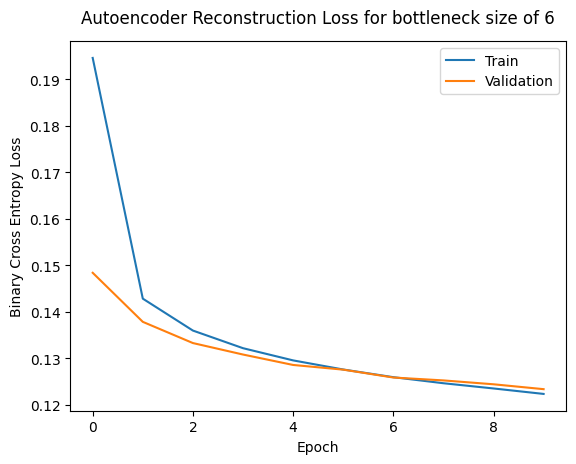

In [24]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss for bottleneck size of 6', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 2s 6ms/step


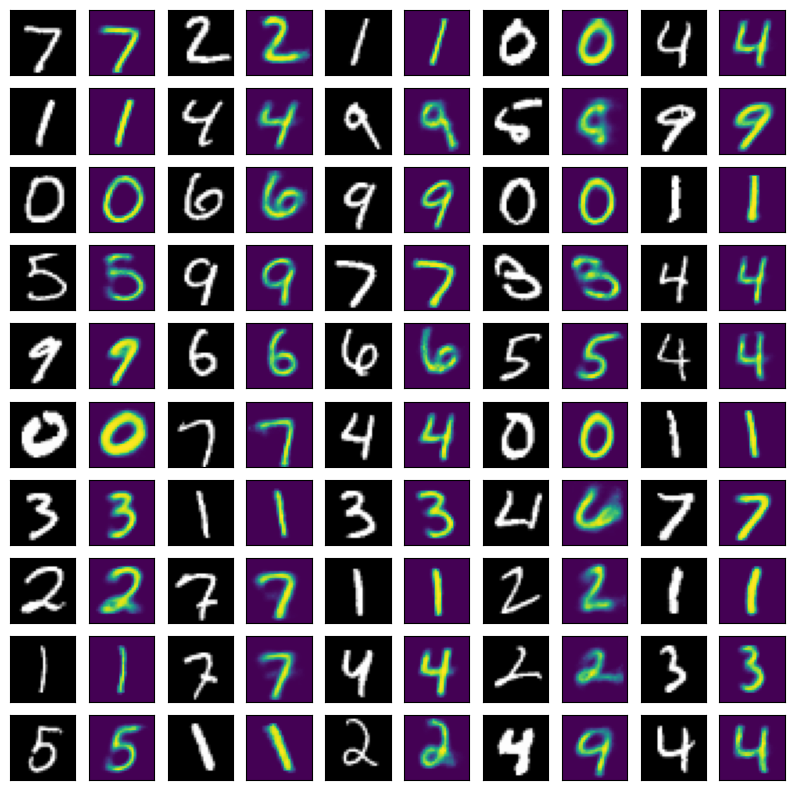

In [25]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### Save the autoencoder for later user.

In [26]:
autoencoder.save('initially_trained_autoencoder.h5')

But what happens if we sent it something it has been trained on? Let’s try it out:

1/1 [==============================] - 0s 22ms/step
(1, 784)


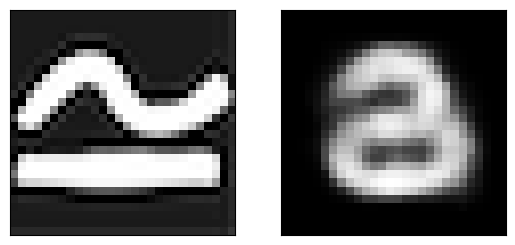

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image
image = tf.keras.utils.load_img('testimg02.png', target_size=(28, 28), color_mode = "grayscale")


####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = autoencoder.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()


### Summary

Since the new image wasn't part of the original training dataset, it's seen as an 'anomoly' by the autoencoder. This is indicated by the difference (error) betweem the original image and the reconstructed image.

#### ICP11 SUmmary

#### We can see that the autoencoder with a bottleneck of six neurons reconstructs the test images reasonably well, except for a couple of images like in our case, its 4(input itself is not clear) and 5 where it gives somewhat same output image i.e. looks like it is 6. Although the reconstructed images lack the sharpness of the originals, they nonetheless preserve the structure and essential characteristics of the input images. Also, we observe a slight increase in the binary cross-entropy loss after few epochs, indicating that the reconstructed images are less similar to the originals.

#### If we raised the limit to 100 neurons, overfitting might be the issue. The model will have more parameters to learn and could be more prone to overfitting with a greater bottleneck. As a result, the model might memorize the training set rather than discover a usable compressed form. We observe a decrease in the binary cross-entropy loss or almost the same, as the model has more capacity to learn a compressed representation that retains more information about the input images. 

### Create an autoencoder model for bottleneck of size 100.

In [12]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 100 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               392500    
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 300)               30300     
                                                                 
 dense_14 (Dense)            (None, 500)              

### Train the autoencoder model.

In [13]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 20s 39ms/step - loss: 0.1787 - val_loss: 0.1214
Epoch 2/10
469/469 [==============================] - 18s 38ms/step - loss: 0.1114 - val_loss: 0.1014
Epoch 3/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0985 - val_loss: 0.0940
Epoch 4/10
469/469 [==============================] - 17s 35ms/step - loss: 0.0927 - val_loss: 0.0899
Epoch 5/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0888 - val_loss: 0.0867
Epoch 6/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0861 - val_loss: 0.0848
Epoch 7/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0843 - val_loss: 0.0830
Epoch 8/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0828 - val_loss: 0.0820
Epoch 9/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0816 - val_loss: 0.0809
Epoch 10/10
469/469 [==============================] - 17s 35ms/step - loss: 0.080

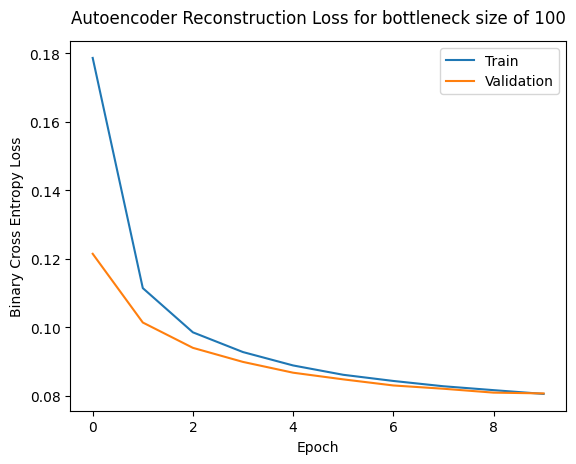

In [16]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss for bottleneck size of 100', pad=13)
plt.legend(loc='upper right')

### Test the autoencoder model by reconstructing the test images and visually inspecting the results.

313/313 [==============================] - 4s 11ms/step


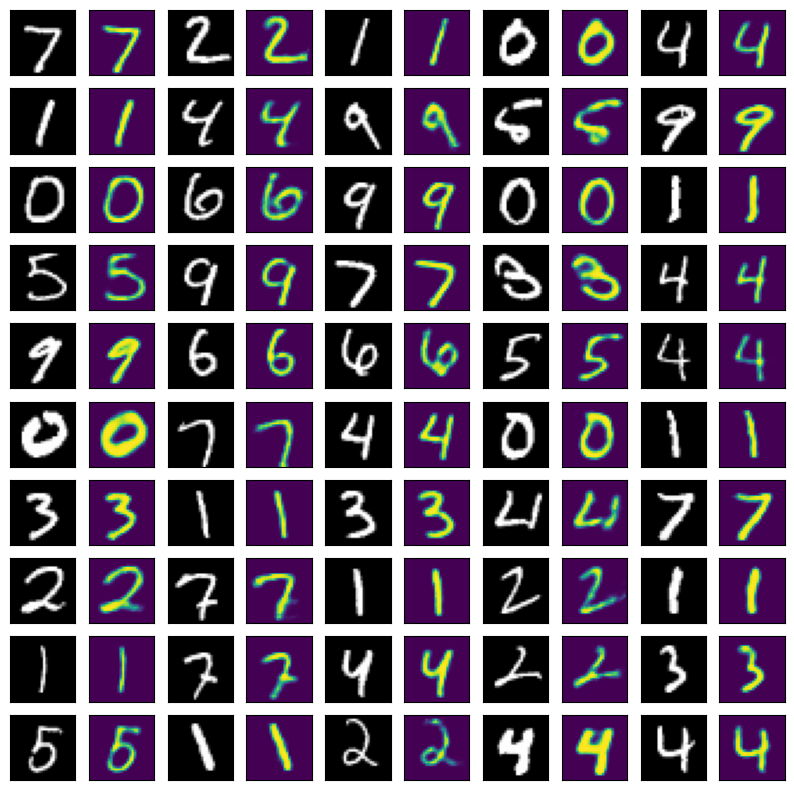

In [15]:
reconstructed_images = autoencoder.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()